<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Bivariate plots to understand relationship with a target variable<span class="tocSkip"></span></h1> 

This analyzes the relationship between the target variable and possible predictive factors. This is particularly helpful for:
- Identifying non-linearities, especially useful for linear regression
- Exploring segmentation
- Uncovering structural relationships between target and independent variables


<h2>Table of Contents<span class="tocSkip"></span></h2>
<ul class="toc-item"><li><span><a href="#Import-key-libraries" data-toc-modified-id="Import-key-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import key libraries</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#Explore-the-dataset" data-toc-modified-id="Explore-the-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explore the dataset</a></span></li><li><span><a href="#Target-variable-analysis" data-toc-modified-id="Target-variable-analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Target variable analysis</a></span></li></ul></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bivariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Continuous-x-variables" data-toc-modified-id="Continuous-x-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Continuous x-variables</a></span><ul class="toc-item"><li><span><a href="#Single-scatter-plot" data-toc-modified-id="Single-scatter-plot-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Single scatter plot</a></span></li><li><span><a href="#Multiple-scatter-plots" data-toc-modified-id="Multiple-scatter-plots-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Multiple scatter plots</a></span></li><li><span><a href="#Bivariate-plot" data-toc-modified-id="Bivariate-plot-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Bivariate plot</a></span></li></ul></li><li><span><a href="#Categorical-/-Discrete-x-variables" data-toc-modified-id="Categorical-/-Discrete-x-variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical / Discrete x-variables</a></span><ul class="toc-item"><li><span><a href="#Barchart" data-toc-modified-id="Barchart-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Barchart</a></span></li><li><span><a href="#Box-and-Whisker-plot" data-toc-modified-id="Box-and-Whisker-plot-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Box and Whisker plot</a></span></li><li><span><a href="#Violin-Plot" data-toc-modified-id="Violin-Plot-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Violin Plot</a></span></li><li><span><a href="#Bivariate-plot---Categorical" data-toc-modified-id="Bivariate-plot---Categorical-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Bivariate plot - Categorical</a></span></li><li><span><a href="#Bivariate-plot---Discrete" data-toc-modified-id="Bivariate-plot---Discrete-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Bivariate plot - Discrete</a></span></li></ul></li></ul></li><li><span><a href="#Segmentation-analysis" data-toc-modified-id="Segmentation-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Segmentation analysis</a></span><ul class="toc-item"><li><span><a href="#Numerical-x-variables" data-toc-modified-id="Numerical-x-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Numerical x-variables</a></span><ul class="toc-item"><li><span><a href="#Scatter-plot" data-toc-modified-id="Scatter-plot-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Scatter plot</a></span></li><li><span><a href="#Bivariate-plots" data-toc-modified-id="Bivariate-plots-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Bivariate plots</a></span></li></ul></li><li><span><a href="#Categorical" data-toc-modified-id="Categorical-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Categorical</a></span><ul class="toc-item"><li><span><a href="#Barplot" data-toc-modified-id="Barplot-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Barplot</a></span></li><li><span><a href="#Violin-Plot" data-toc-modified-id="Violin-Plot-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Violin Plot</a></span></li><li><span><a href="#Bivariate-plot" data-toc-modified-id="Bivariate-plot-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Bivariate plot</a></span></li></ul></li></ul></li></ul>

# Import key libraries

In [1]:
# Import key libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

**Import code stored in the utilities folder**

In [2]:
import sys
sys.path.insert(0, "../../utilities")
from model_plots import bivariate_plots_continuous

# Load dataset

In [3]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
dataset = pd.read_csv("sample_input/car_price_prediction.csv", low_memory=False)
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4/5,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,4/5,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4/5,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4/5,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4/5,Left wheel,Silver,4


## Explore the dataset
**This uses the data exploration code, which should be automatically downloaded and available if you are using the Gryphon tool** 

In [4]:
from data_exploration import dataset_overview

In [5]:
num_info = dataset_overview.get_numerical_info(dataset)

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
data type,int64,int64,float64,int64,int64,int64,int64
count,19237,19237,13418,19237,19237,19237,19237
# non-missing,19237,19237,13418,19237,19237,19237,19237
# missing,0,0,5819,0,0,0,0
# of 0s,0,0,0,0,721,0,2405
# unique values,18924,2315,558,54,7687,13,17
sum,876755820841.0,356960372.0,12167954.0,38683930.0,29475617924.0,88163.0,126630.0
mean,45576535.886105,18555.927224,906.838128,2010.912824,1532235.687685,4.582991,6.582627
standard deviation,936591.422799,190581.269684,461.867051,5.668673,48403869.37929,1.199933,4.320168
skewness,-11.868235,136.470427,5.449954,-2.082261,38.896821,2.091083,0.082012


In [6]:
cat_info = dataset_overview.get_non_numerical_info(dataset)

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color
data type,object,object,object,object,object,object,object,object,object,object,object
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
# non-missing,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
# missing,0,0,0,0,0,0,0,0,0,0,0
# of blanks,0,0,0,0,0,0,0,0,0,0,0
# unique values,65,1590,11,2,7,107,4,3,3,2,16
most frequent,HYUNDAI,Prius,Sedan,Yes,Petrol,2,Automatic,Front,4/5,Left wheel,Black
average length,6.821334,5.88834,5.583303,2.725373,5.819722,3.077559,8.668815,4.458284,2.993346,10.462858,5.054998
potentially numeric,No,No,No,No,No,No,No,No,No,No,No
potentially datetime,No,No,No,No,No,No,No,No,No,No,No


## Target variable analysis

For more in-depth analysis, use the functions provided by the data exploration template

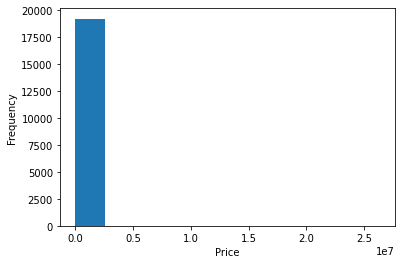

In [7]:
fig, ax = plt.subplots()
ax.hist(dataset['Price'])
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
plt.show()

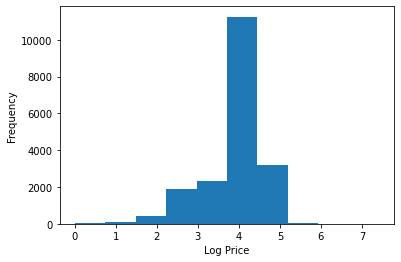

In [8]:
# Log-transform the data
fig, ax = plt.subplots()
ax.hist(np.log10(dataset['Price']))
ax.set_xlabel("Log Price")
ax.set_ylabel("Frequency")
plt.show()

**Due to some extreme price observations, we create a capped price variable for some visualizations that cannot easily deal with outliers**

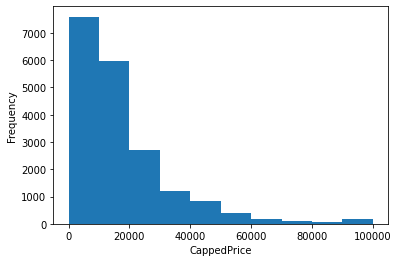

In [9]:
dataset['CappedPrice'] = np.minimum(100000, dataset["Price"])
fig, ax = plt.subplots()
ax.hist(dataset['CappedPrice'])
ax.set_xlabel("CappedPrice")
ax.set_ylabel("Frequency")
plt.show()

# Bivariate Analysis

## Continuous x-variables

The simplest way is a **scatter plot** to visualize the relationship between the target variable and a continuous x-variable. However, it can be challenging to interpret a scatterplot due to noise in the data and impact of other predictive variables. A scatterplot is nevertheless a good starting point to help with:
- Understanding level of noise
- Finding outliers that may require use of transformations, such as capping and flooring
- Identifying very clear patterns

Following the scatter plot, an aggregated **bivariate plot** is typically used to hone in on the relationship between the target variable and a contintuous x-variable to help decide on the appropriate transformation.

We start by generating a single chart for each, and then show how multiple charts can be generated and saved to disk.

### Single scatter plot

Scatterplots can be slow when too many points are plotted. Therefore, it is recommended to sample data if the dataset is too large, as well as to provide the ranges of the data (in case outliers are sampled out)

Sampled 1000 out of 19237 observations
Target variable Price has a range of [1,26307500] prior to sampling and a range of [1,26307500] following sampling
Target variable Mileage has a range of [0,2147483647] prior to sampling and a range of [0,2500000] following sampling


Text(0.5, 0, 'Mileage')

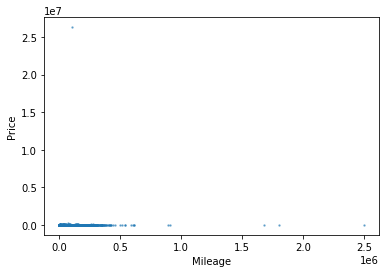

In [10]:
x_variable = "Mileage"
target = "Price"
N = 1000 # Maximum number of observations

plot_data = dataset[[target, x_variable]]
if plot_data.shape[0] > N:
    plot_data = plot_data.sample(N)
    print("Sampled {} out of {} observations".format(N, dataset.shape[0]))
    print("Target variable {} has a range of [{},{}] prior to sampling and a range of [{},{}] following sampling".format(
        target, np.nanmin(dataset[target]), np.nanmax(dataset[target]), np.nanmin(plot_data[target]), np.nanmax(plot_data[target])))
    print("Target variable {} has a range of [{},{}] prior to sampling and a range of [{},{}] following sampling".format(
        x_variable, np.nanmin(dataset[x_variable]), np.nanmax(dataset[x_variable]), np.nanmin(plot_data[x_variable]), np.nanmax(plot_data[x_variable])))
    
fig, ax = plt.subplots() 
ax.scatter(x=plot_data[x_variable], y=plot_data[target], alpha=0.5, s=2)
ax.set_ylabel(target)
ax.set_xlabel(x_variable)

**Due to massive outliers, one may consider either removing outliers or using a log-transformation to visualize the chart**

Below, we add log-transformation

Sampled 1000 out of 19237 observations
Target variable Price has a range of [1,26307500] prior to sampling and a range of [6,26307500] following sampling
Target variable Mileage has a range of [0,2147483647] prior to sampling and a range of [0,1234567899] following sampling


Text(0.5, 0, 'ln(1+Mileage)')

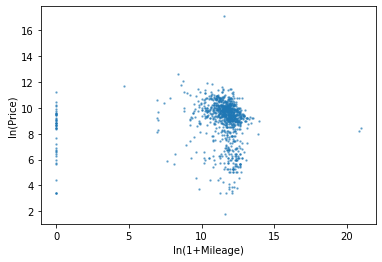

In [11]:
x_variable = "Mileage"
target = "Price"
N = 1000 # Maximum number of observations

plot_data = dataset[[target, x_variable]]
if plot_data.shape[0] > N:
    plot_data = plot_data.sample(N)
    print("Sampled {} out of {} observations".format(N, dataset.shape[0]))
    print("Target variable {} has a range of [{},{}] prior to sampling and a range of [{},{}] following sampling".format(
        target, np.nanmin(dataset[target]), np.nanmax(dataset[target]), np.nanmin(plot_data[target]), np.nanmax(plot_data[target])))
    print("Target variable {} has a range of [{},{}] prior to sampling and a range of [{},{}] following sampling".format(
        x_variable, np.nanmin(dataset[x_variable]), np.nanmax(dataset[x_variable]), np.nanmin(plot_data[x_variable]), np.nanmax(plot_data[x_variable])))
    
fig, ax = plt.subplots() 
ax.scatter(x=np.log1p(plot_data[x_variable]), y=np.log(plot_data[target]), alpha=0.5, s=2)
ax.set_ylabel("ln({})".format(target))
ax.set_xlabel("ln(1+{})".format(x_variable))

**The seaborn package provides a 2D density plot as an alternative way of visualizing the relationship**

We've created an easy to use function for it, that also enables "signed log"-transformations: *sign(x) * log10(1+|x|)* of both y and x axes

There are more than 1000 observations, so a sample will be used to generate the plot
Sampled 1000 out of 1000 observations
Target variable Price has a range of [1,26307500] prior to sampling and a range of [3,147397] following sampling
Target variable Mileage has a range of [0,2147483647] prior to sampling and a range of [0,2147483647] following sampling


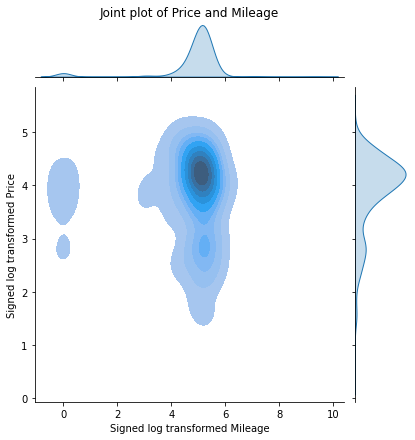

In [12]:
x_variable = "Mileage"
target = "Price"

fig = bivariate_plots_continuous.kdeplot_num(dataset, y=target, x=x_variable, log_y=True, log_x=True, sample_size = 1000)
fig

### Multiple scatter plots

**You may wish to generate scatter plots for multiple numerical variables, and have these charts saved as images for review**
The following function below offers this functionality. Make sure that the x-variables have names that are valid file-names.

Sampled 1000 out of 19237 observations


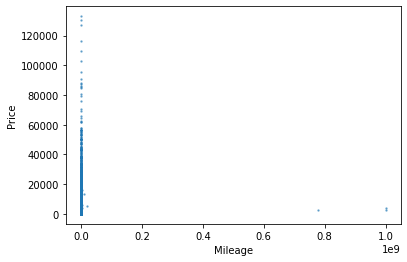

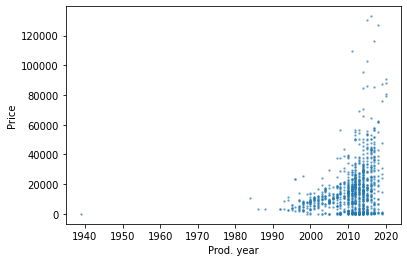

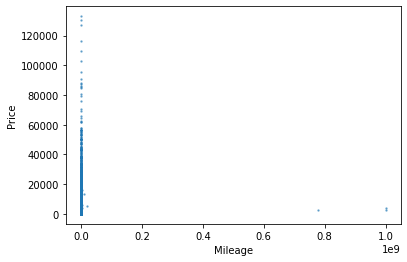

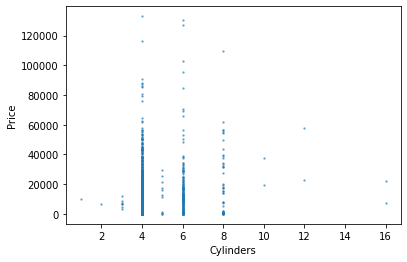

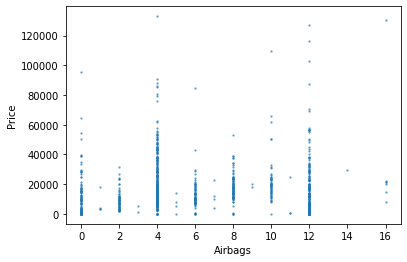

In [13]:
all_x = ["Mileage", "Prod. year", "Mileage", "Cylinders", "Airbags"]
y = "Price"

plots, sampling_info = bivariate_plots_continuous.scatterplot_batch(dataset, y, all_x, log_y=False, log_x=False, sample_size=1000, save_outputs="sample_outputs")

### Bivariate plot

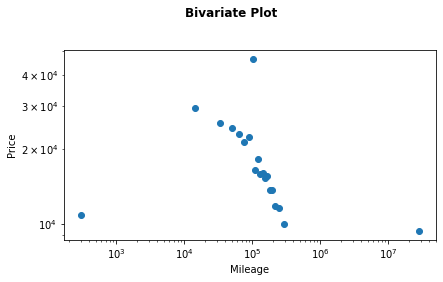

In [14]:
x_variable = "Mileage"
target = "Price"
fig, plotdata = bivariate_plots_continuous.bivariate_continuous(dataset, target, x_variable, num_buckets=20, y_scale='log', x_scale='log', with_count=False, header=None)

**See the doc strings for more information**

In [15]:
help(bivariate_plots_continuous.bivariate_continuous)

Help on function bivariate_continuous in module model_plots.bivariate_plots_continuous:

bivariate_continuous(used_data, y_var, x_var, num_buckets=20, y_scale='linear', x_scale='linear', with_count=True, with_stderr=False, with_CI=False, lower=-inf, upper=inf, trendline=False, header=None)
    Generates bivariate plots for continuous variables, where the data is bucketed based on x-variable percentiles.
    Provides option to scale the y-axis and count of observations in each bucket (in case there is concentration)
    :param used_data: a single pandas DataFrame containing the y-variable and the x-variable
    :param y_var: a single string with the name of the y-variable
    :param x_var: a single string with the name of the x-variable
    :param num_buckets: Integer number of buckets (quantiles) for which to group the x-variable values
    :param y_scale: Scale the y-axis, either: 'linear', 'log', 'logit', or 'symlog'
    :param x_scale: Scale the x-axis, either: 'linear', 'log', 'log

## Categorical / Discrete x-variables

For these variables, the data is grouped by each unique value. We can look at barchart, box and whisker plot, violin plot, and aggregated bivariate plot


### Barchart

Compares the average dependent variable value by x-variable value

Text(0.5, 0, 'Drive wheels')

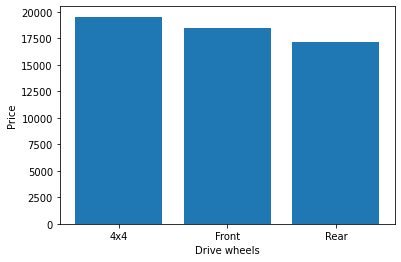

In [16]:
x_variable = "Drive wheels"
target = "Price"

plot_data = dataset[[target, x_variable]].groupby(x_variable).mean()

fig, ax = plt.subplots() 
ax.bar(x=plot_data.index, height=plot_data[target])
ax.set_ylabel(target)
ax.set_xlabel(x_variable)

### Box and Whisker plot

Compares the 25th, 50th, 75th percentiles of the dependent variable value by x-variable value. See more at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

**Here we opted to ignore outliers by using showfliers = False since there are extreme outliers**

Text(0.5, 0, 'Drive wheels')

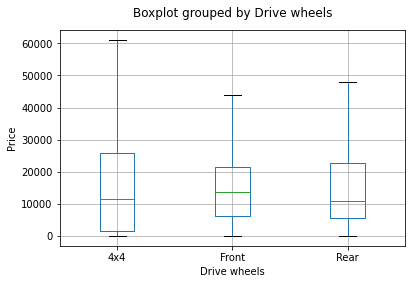

In [17]:
x_variable = "Drive wheels"
target = "Price"

plot_data = dataset[[target, x_variable]].groupby(x_variable)

fig, ax = plt.subplots() 

dataset[[target, x_variable]].boxplot(column=target, by=x_variable, ax=ax, showfliers=False) 
ax.set_title("")
ax.set_ylabel(target)
ax.set_xlabel(x_variable)

### Violin Plot

The violin plot provides more information about how the target variable is distributed. Due to extreme outliers, we use the capped price

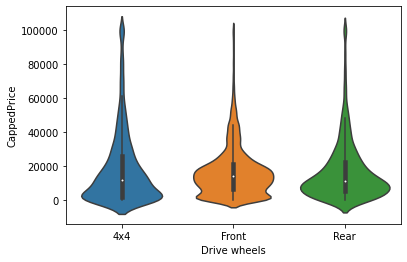

In [18]:
x_variable = "Drive wheels"
target = "CappedPrice"

g = sns.violinplot(x=x_variable, y=target, data=dataset)

### Bivariate plot - Categorical

This plot is similar to the barplot, by showing the average target variable value by x-variable category, but it offers additional information such as number of observations, confidence intervals, etc. 

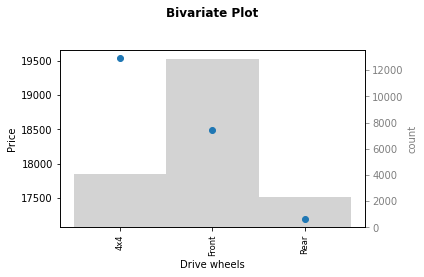

In [19]:
x_variable = "Drive wheels"
target = "Price"
fig, plotdata = bivariate_plots_continuous.bivariate_categorical(dataset, target, x_variable, discrete=False, y_scale='linear', with_count=True, header=None, with_stderr=False)

### Bivariate plot - Discrete

Discrete plots are used for numerical x-variables whose values should be plotted separately

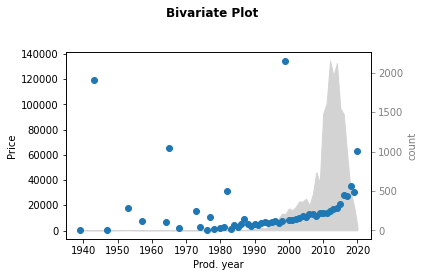

In [20]:
x_variable = "Prod. year"
target = "Price"
fig, plotdata = bivariate_plots_continuous.bivariate_categorical(dataset, target, x_variable, discrete=True, y_scale='linear', with_count=True, header=None)

# Segmentation analysis

This looks at whether the relationship between target and x-variables differ by segments of the data

## Numerical x-variables

### Scatter plot

Sampled 1000 out of 19237 observations
Target variable Price has a range of [1,26307500] prior to sampling and a range of [6,150533] following sampling
Target variable Mileage has a range of [0,2147483647] prior to sampling and a range of [0,1777777778] following sampling


[None, None]

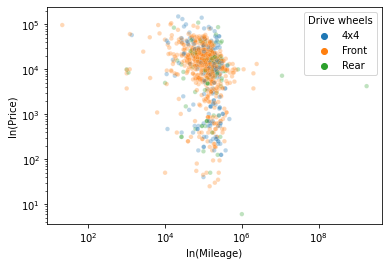

In [21]:
x_variable = "Mileage"
target = "Price"
segment_variable = "Drive wheels"
N = 1000 # Maximum number of observations

plot_data = dataset[[target, x_variable, segment_variable]]
if plot_data.shape[0] > N:
    plot_data = plot_data.sample(N)
    print("Sampled {} out of {} observations".format(N, dataset.shape[0]))
    print("Target variable {} has a range of [{},{}] prior to sampling and a range of [{},{}] following sampling".format(
        target, np.nanmin(dataset[target]), np.nanmax(dataset[target]), np.nanmin(plot_data[target]), np.nanmax(plot_data[target])))
    print("Target variable {} has a range of [{},{}] prior to sampling and a range of [{},{}] following sampling".format(
        x_variable, np.nanmin(dataset[x_variable]), np.nanmax(dataset[x_variable]), np.nanmin(plot_data[x_variable]), np.nanmax(plot_data[x_variable])))
    
fig, ax = plt.subplots() 
g=sns.scatterplot(x=x_variable, y=target, hue=segment_variable, data=plot_data, ax=ax, alpha=0.3, s=20)
ax.set_ylabel("ln({})".format(target))
ax.set_xlabel("ln({})".format(x_variable))
ax.set(xscale="log", yscale="log")

### Bivariate plots

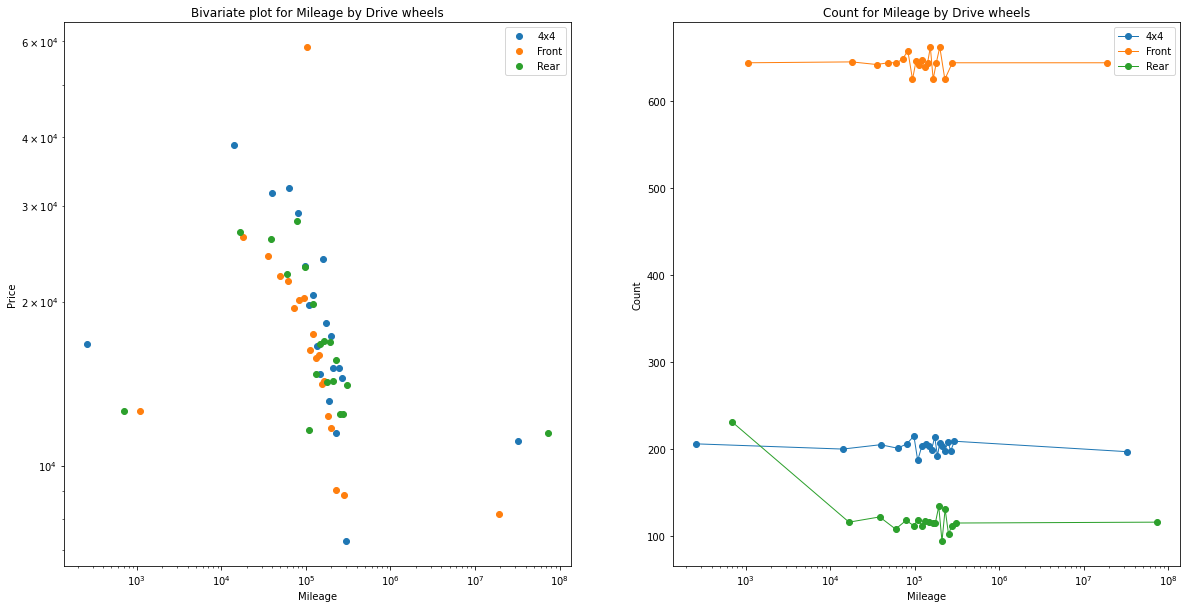

In [22]:
x_variable = "Mileage"
target = "Price"
segment_variable = "Drive wheels"
fig, plotdata = bivariate_plots_continuous.segment_bivariate_continuous(dataset, target, x_variable, segment_variable, num_buckets=20, y_scale='log', x_scale='log')

## Categorical

### Barplot

<AxesSubplot:xlabel='Fuel type', ylabel='count'>

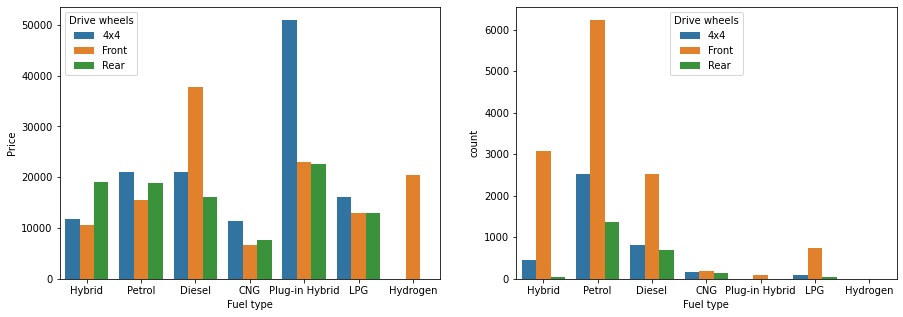

In [23]:
x_variable = "Fuel type"
target = "Price"
segment_variable = "Drive wheels"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(data=dataset, x=x_variable, y=target, hue=segment_variable, ci=False, ax = ax1)
sns.countplot(data=dataset, x=x_variable, hue=segment_variable, ax = ax2)

### Violin Plot

<AxesSubplot:xlabel='Fuel type', ylabel='count'>

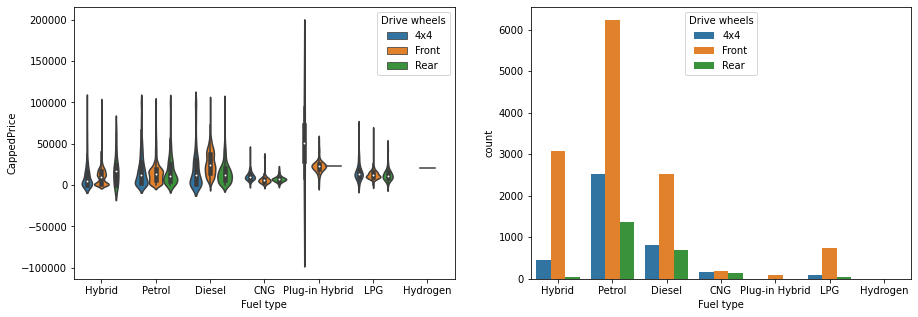

In [24]:
x_variable = "Fuel type"
target = "CappedPrice"
segment_variable = "Drive wheels"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.violinplot(x=x_variable, y=target, hue=segment_variable, data=dataset, ax = ax1)
sns.countplot(data=dataset, x=x_variable, hue=segment_variable, ax = ax2)

### Bivariate plot

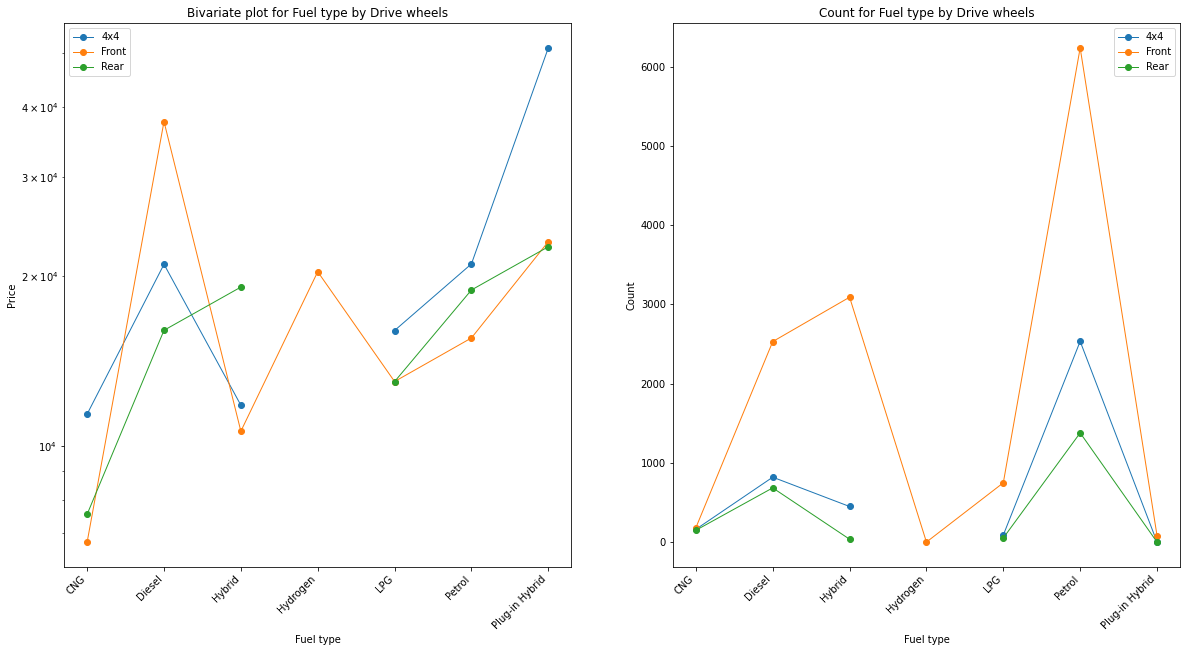

In [26]:
x_variable = "Fuel type"
target = "Price"
segment_variable = "Drive wheels"
fig, plotdata = bivariate_plots_continuous.segment_bivariate_categorical(dataset, target, 
                                                                         x_variable, segment_variable, 
                                                                         y_scale='log', discrete = False)

**Bivariate plot for distrete x-variable**

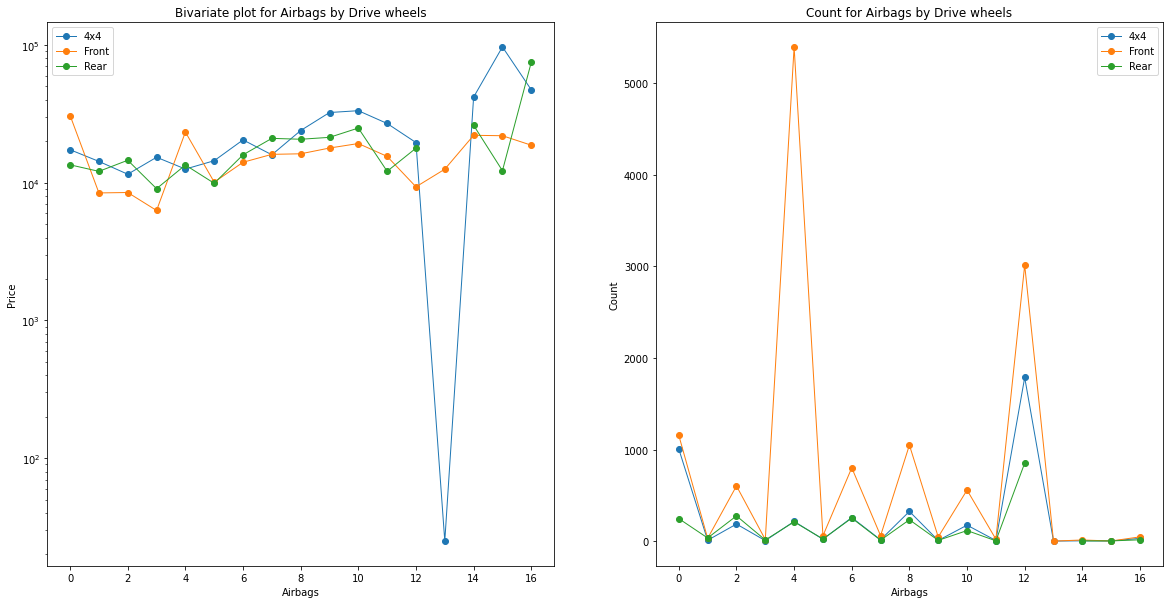

In [29]:
x_variable = "Airbags"
target = "Price"
segment_variable = "Drive wheels"
fig, plotdata = bivariate_plots_continuous.segment_bivariate_categorical(dataset, target, x_variable, segment_variable, y_scale='log')